<a href="https://colab.research.google.com/github/DJS-INFOMATRIX/Machine-Learning/blob/main/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Networks (RNN)

It is the type of neural network which is mainly used for Sequential data. Sequential data is the the data that depends on the order of the data occurring.
Sequential data include time series data, natural language text or speech or any kind of data where the order of the data is important.

Unlike a normal feed forward neural network, RNNs have a memory which store information of what has been processed so far. This makes it such that the output at any time instant is not just dependent on the corresponding input but is also dependent on the memory stored of the previous time instant. This memory is known as the hidden state.

Hi Veer!



**Structure of a RNN**

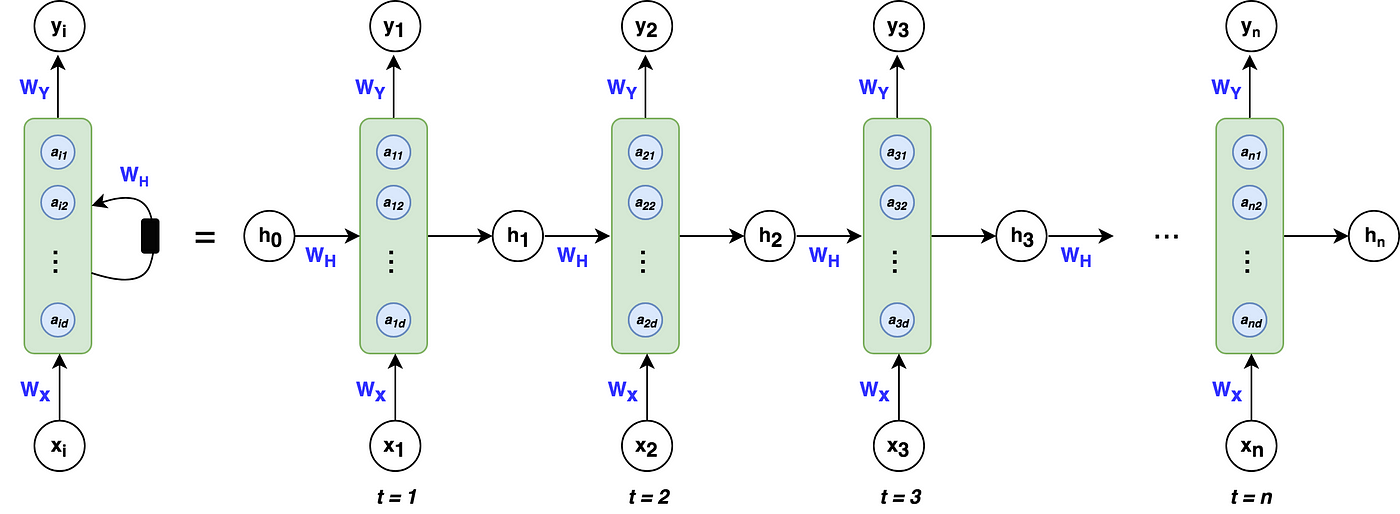

**Types of RNNs**

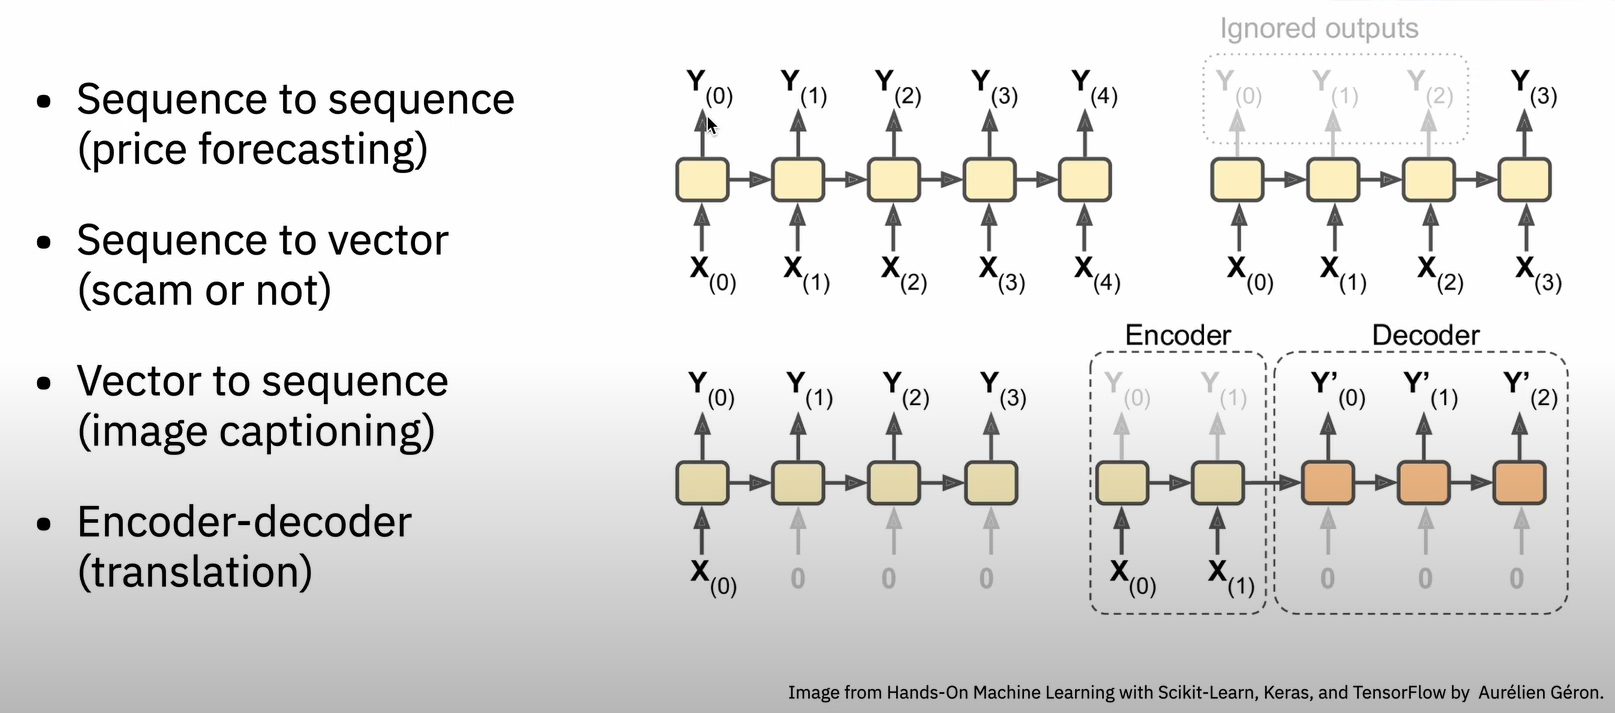

**Sequence to Sequence :** There is input and output at each time instance. This type of RNN is used mainly for time series forecasting purposes, i.e. Stock Price prediction or Signal forecasting.


**Sequence to Vector :** This type of RNN has a sequence of inputs and it also provides a sequence of outputs, but only the final output is considered while the other outputs at previous time instances are neglected. This RNN is used for sentiment analysis or classification purposes. Eg. Email classification (scam or not), Sentiment analysis from Text, etc.

**Vector to Sequence :** The input is provided at the beginning and subsequent outputs are generated by the model. Eg : Let's say we input an image of a dog running on a beach. Then the output will be a sequence of words (therefore sequence of outputs) that are generated by the model after analysing the image.

**Encoder Decoder :** There are multiple inputs and multiple outputs. But only the outputs that are generated after the completion of input sequence is considered while other outputs are neglected. This can be understood from the example of a language translator. So in translation, we do not translate word for word. So the complete sentence is considered as a whole and based on that the translation is done. This is to be done since analysing the complete sentence will help the machine understand the context in which the word was used.

**Working**

Imagine you are reading a sentence, one word at a time. As you read each word, your understanding of the sentence so far is influenced by the words you have already read. Similarly, an RNN processes each element of a sequence one at a time, but it keeps track of previous elements using a hidden state.

Here's a step-by-step breakdown of how an RNN processes a sequence:

**1 ) Initialization:** The RNN starts with random weights and biases.

**2 ) Forward Pass:**
* The input sequence is fed into the RNN, one element at a time.
* At each time step, the current input is combined with the hidden state from the previous time step.
* The combined information is passed through a nonlinear activation function (e.g., tanh or ReLU) to produce a new hidden state.
* The output of the RNN is typically generated based on the final hidden state or a combination of hidden states throughout the sequence.

**3 ) Error Calculation:** The difference between the predicted output and the actual output is calculated.

**4 ) Backpropagation Through Time (BPTT):**
* The error is propagated backward through the network, updating the weights and biases at each time step.
* BPTT is a modified version of backpropagation that allows for the efficient computation of gradients in RNNs.

**5 ) Weight Update:** The weights and biases are updated using an optimization algorithm like gradient descent or its variants (e.g., Adam, RMSprop).

**6 ) Output :** The RNN can produce an output at each time step, or it can produce a final output after processing the entire sequence. This output can be used for tasks such as sequence classification, time series prediction, or language translation.

**Updating the hidden state :**

$$ h_t = \text{activation}(W_x \cdot x_t + W_y \cdot h_{t-1} + b) $$

Where:
- $W_x$ is the weight matrix for the input $x_t$.
- $W_y$ is the weight matrix for the hidden state $h_{t-1}$.
- b is the bias term.
- activation is the activation function applied to the linear combination of the inputs.



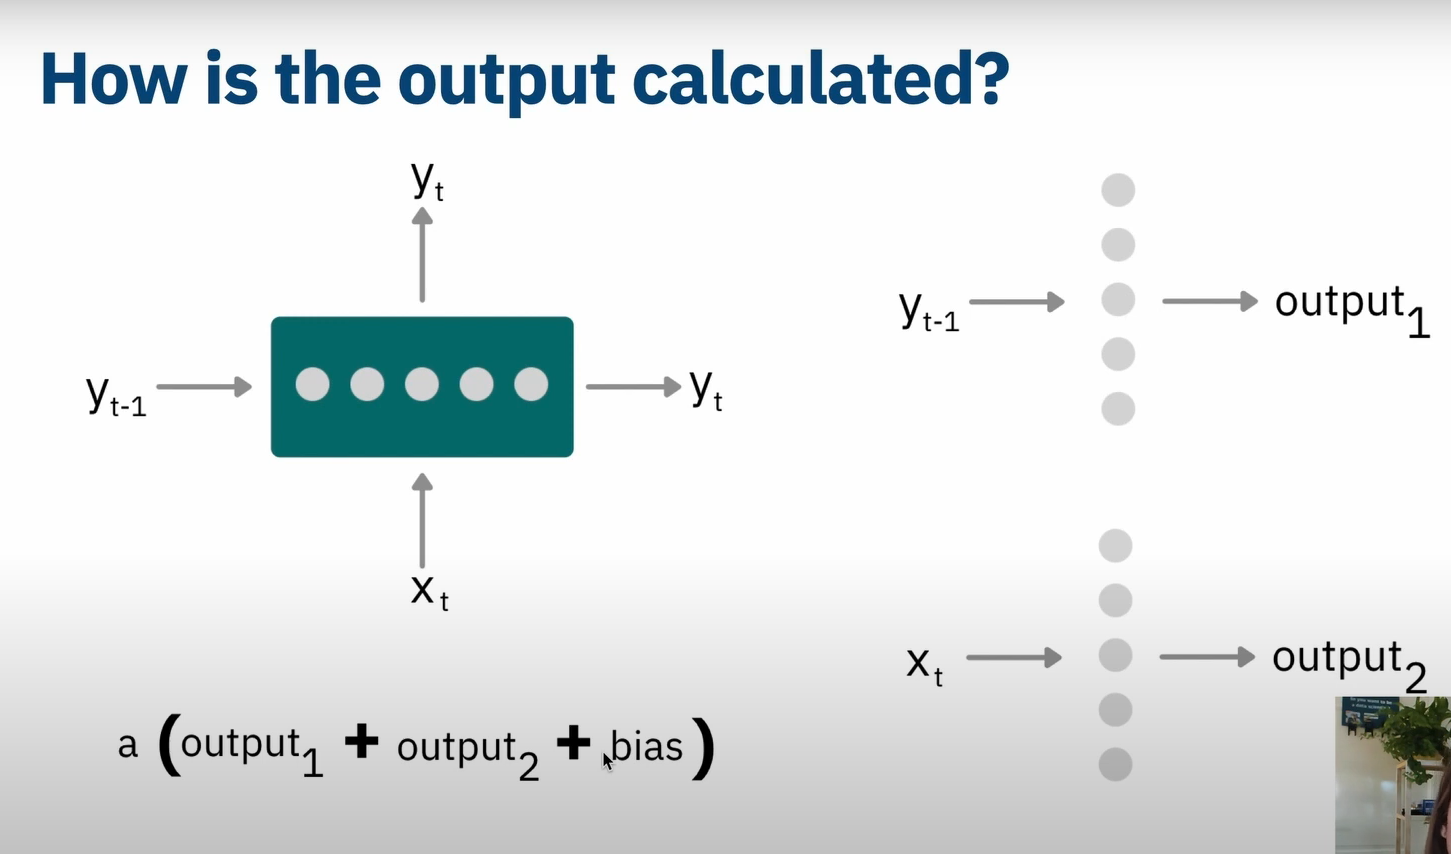

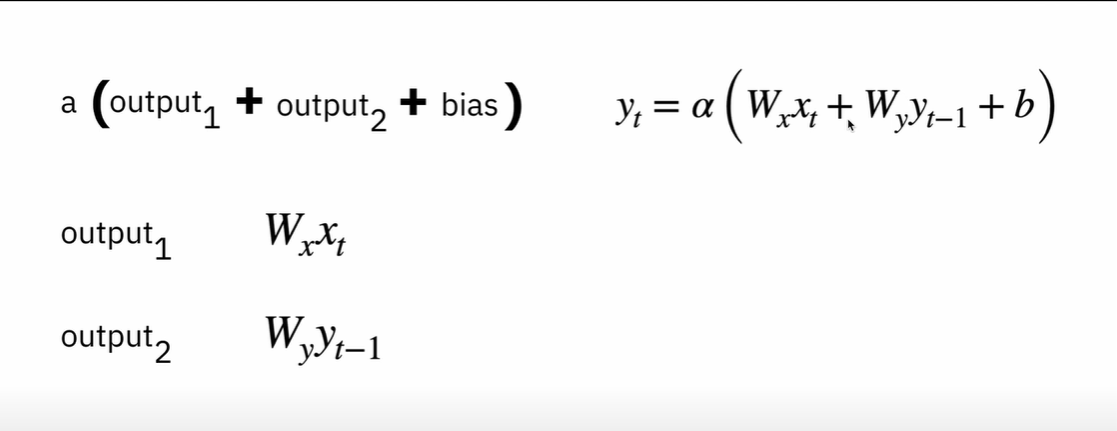

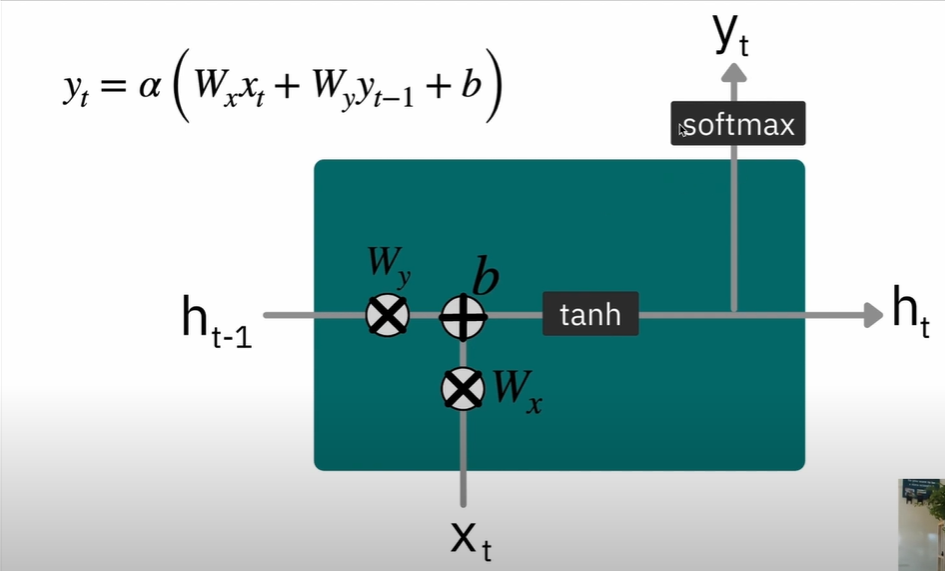

**Backpropagation Through Time (BPTT)**

BPTT is a key algorithm in training RNNs. It involves the following steps:

**Forward Pass :** The input sequence is processed as described above.

**Error Calculation :** The error between the predicted output and the target is calculated.

**Backward Pass :**The error is propagated backward through the network, starting from the final time step.
The gradients of the loss function with respect to the weights and biases at each time step are computed.
The gradients are accumulated over time to obtain the total gradient for each weight and bias.

**Weight Update :** The weights and biases are updated using the accumulated gradients.

In [1]:
!pip install yfinance

In [2]:
!pip install --upgrade statsmodels

In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error

In [18]:
google_data=yf.download('GOOGL',start='2020-07-01',end='2024-07-01')

[*********************100%***********************]  1 of 1 completed


In [19]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,70.958504,72.424004,70.709000,72.099998,72.017342,42182000
2020-07-02,72.592003,74.426003,72.553497,73.496498,73.412247,57218000
2020-07-06,74.407501,75.500000,73.848999,74.982498,74.896538,44712000
2020-07-07,74.806503,76.066002,74.485001,74.496002,74.410599,42364000
2020-07-08,75.040001,75.558502,74.614998,75.180000,75.093819,31766000


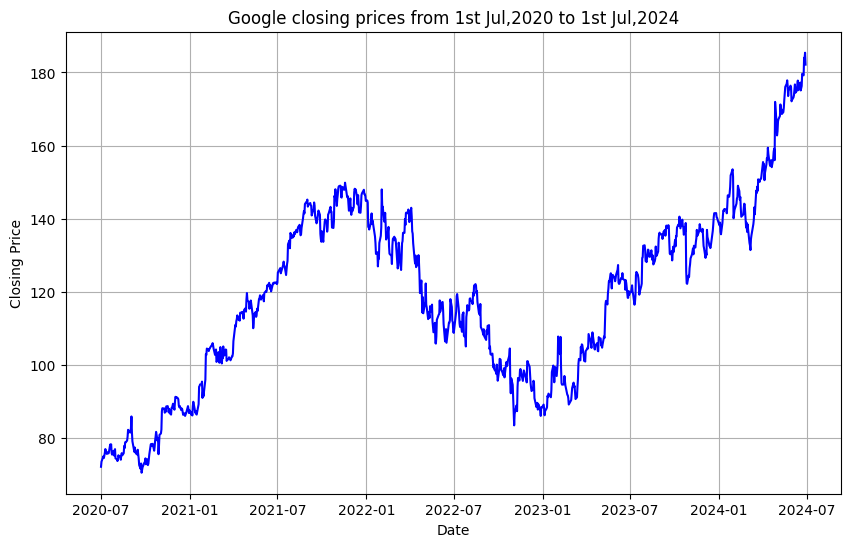

In [20]:
plt.figure(figsize=(10,6))  #Sets the size of the plot
plt.plot(google_data['Close'],color='blue')
plt.xlabel('Date')
plt.ylabel("Closing Price")
plt.title("Google closing prices from 1st Jul,2020 to 1st Jul,2024")
plt.grid()
plt.show()

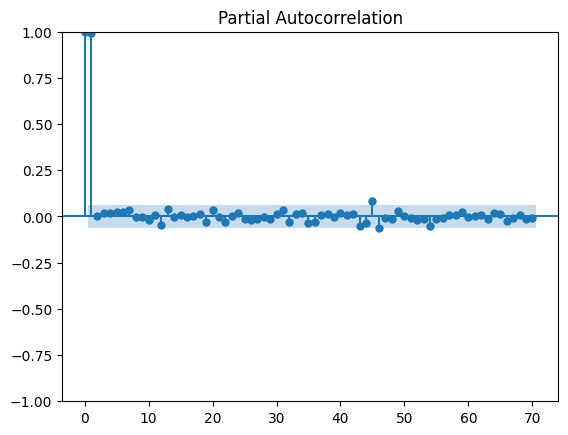

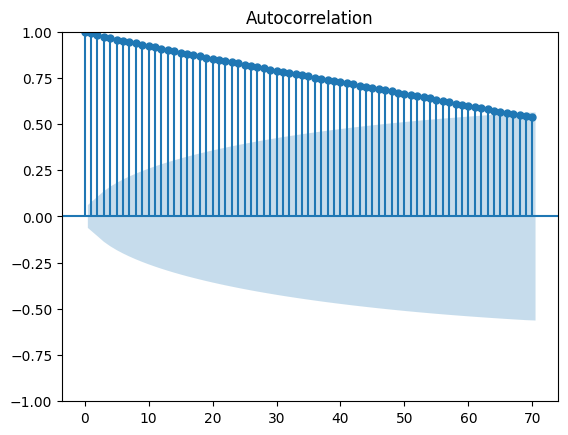

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

pacf=plot_pacf(google_data['Close'],lags=70)
acf=plot_acf(google_data['Close'],lags=70)

In [62]:
train=google_data['Close'][:len(google_data)-30]
test=google_data['Close'][len(google_data)-30:]
val=train[len(train)-30:]

In [63]:
train = train.values.reshape(-1, len(train), 1)
train_target = train[:, 1:, 0]

In [64]:
val = val.values.reshape(-1, len(val), 1)
val_target = val[:, 1:, 0]

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,SimpleRNN, Dense,Dropout,BatchNormalization

model = Sequential([
    Input(shape=(len(train),1)),                          #Shape will be as such (sequence_size,input_size)

    SimpleRNN(units=100, return_sequences=True,activation='relu'),   #Default activation function for RNN layer is tanh but we could specify otherwise.
    Dropout(0.3),
    BatchNormalization(),

    SimpleRNN(units=100,return_sequences=True,activation='relu'),                          # 100 is the number of neurons in the RNN layer.
    Dropout(0.3),
    BatchNormalization(),

    SimpleRNN(units=100,activation='relu'),
    Dropout(0.3),
    BatchNormalization(),

    Dense(units=1)                                #This acts as the output value and since we want the predicted value for the price we will keep 1 neuron in the output layer
])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_19 (SimpleRNN)            │ (None, 1, 100)              │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 1, 100)              │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_20 (SimpleRNN)            │ (None, 1, 100)              │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 1, 100)              │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_21 (SimpleRNN)            │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,701 (201.96 KB)

 Trainable params: 51,101 (199.61 KB)

 Non-trainable params: 600 (2.34 KB)

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01),loss='mean_absolute_error')
history=model.fit(train,train_target,epochs=1000, batch_size=32,validation_data=(val,val_target),callbacks=[early_stopping])

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 117.0819 - val_loss: 153.1911
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - loss: 116.6532 - val_loss: 154.5947
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step - loss: 116.1722 - val_loss: 154.5737
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step - loss: 115.5957 - val_loss: 154.5136
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step - loss: 114.9493 - val_loss: 154.2511
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step - loss: 114.2499 - val_loss: 153.7536
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step - loss: 113.5078 - val_loss: 153.1491
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step - loss: 112.7291 - val_loss: 152.5114
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step - loss: 111.9178 - val_loss: 151.8379
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step - loss: 111.0766 - val_loss: 151.1552
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step - loss: 110.2073 - val_loss: 150.3714
Epoch 12/10

In [71]:
pred=model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


In [72]:
print(pred)

[[77.6072  ]
 [77.244255]
 [77.07825 ]
 [76.89866 ]
 [77.182465]
 [77.7288  ]
 [77.45081 ]
 [77.17862 ]
 [77.275116]
 [78.00682 ]
 [77.931496]
 [77.802185]
 [77.68247 ]
 [77.36973 ]
 [77.11491 ]
 [77.55312 ]
 [77.44696 ]
 [77.13617 ]
 [76.91029 ]
 [77.41803 ]
 [77.10334 ]
 [77.01646 ]
 [77.43148 ]
 [77.19793 ]
 [76.555   ]
 [76.63421 ]
 [75.79752 ]
 [75.82306 ]
 [75.56264 ]
 [76.117485]]


In [73]:
print(test)

Date
2024-05-16    174.179993
2024-05-17    176.059998
2024-05-20    176.919998
2024-05-21    177.850006
2024-05-22    176.380005
2024-05-23    173.550003
2024-05-24    174.990005
2024-05-28    176.399994
2024-05-29    175.899994
2024-05-30    172.110001
2024-05-31    172.500000
2024-06-03    173.169998
2024-06-04    173.789993
2024-06-05    175.410004
2024-06-06    176.729996
2024-06-07    174.460007
2024-06-10    175.009995
2024-06-11    176.619995
2024-06-12    177.789993
2024-06-13    175.160004
2024-06-14    176.789993
2024-06-17    177.240005
2024-06-18    175.089996
2024-06-20    176.300003
2024-06-21    179.630005
2024-06-24    179.220001
2024-06-25    184.029999
2024-06-26    183.880005
2024-06-27    185.410004
2024-06-28    182.149994
Name: Close, dtype: float64


In [74]:
pred_df = pd.DataFrame(pred, index=test.index, columns=['Predicted'])
combined_df = pd.concat([test, pred_df], axis=1)

combined_df.head()

,Close,Predicted
Date,,
2024-05-16,174.179993,77.607201
2024-05-17,176.059998,77.244255
2024-05-20,176.919998,77.078247
2024-05-21,177.850006,76.898659
2024-05-22,176.380005,77.182465


In [75]:
print(f"Mean absolute percent error : {np.mean(np.abs((combined_df['Close']-combined_df['Predicted'])/test))*100}")

Mean absolute percent error : 56.37154080959886


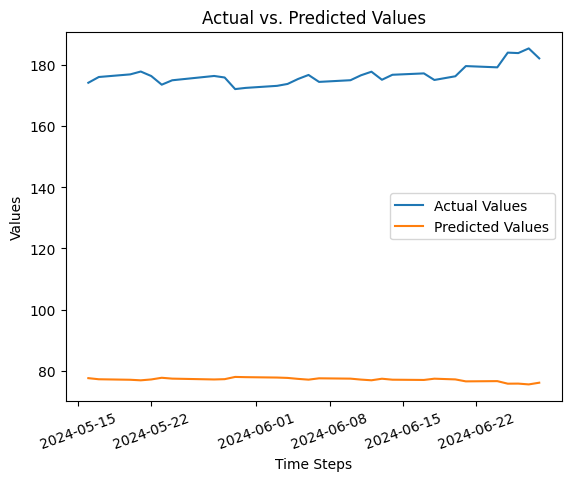

In [76]:
plt.plot(combined_df['Close'], label='Actual Values')
plt.plot(combined_df['Predicted'], label='Predicted Values')
plt.legend()
plt.xlabel('Time Steps')
plt.xticks(rotation=20)
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.show()